<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Insurance_Cost_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Forecast by using Linear Regression 

https://www.kaggle.com/mirichoi0218/insurance

## Medical Cost Personal Datasets :

* Columns

* age

* sex

* bmi

* children

* smoker

* region

* charges

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

## Import training dataset into google colab

In [0]:
from google.colab import files
files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

## Import Training data into a dataframe

In [0]:
df = pd.read_csv('insurance.csv')

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Convert categorical values using one hot encoding

In [0]:
labels = pd.get_dummies(df[['sex','smoker','region']])
labels.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [0]:
df = pd.concat((df,labels),axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [0]:
df.shape

(1338, 15)

## Select Predictors and Labels

In [0]:
X = df.drop(['sex','smoker','region','charges'],axis=1)
Y = df['charges']

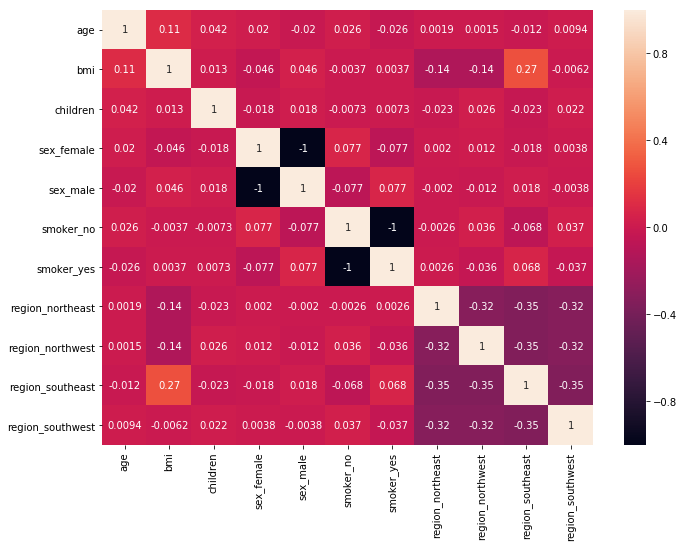

In [0]:
import seaborn as sns
plt.figure(figsize=(11,8))
sns.heatmap(X.corr(),annot=True)

## Visualization of  smokers who have children

Text(0.5, 1.0, 'Number of chidren possesesd by Smoker and non-smoker')

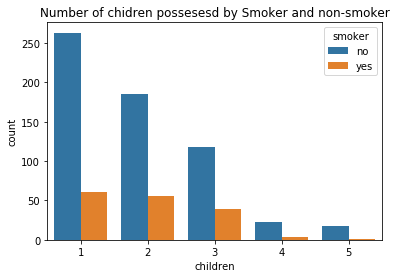

In [0]:
sns.countplot(x='children',data=df[df['children']> 0],hue='smoker')
plt.title('Number of chidren possesesd by Smoker and non-smoker')

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

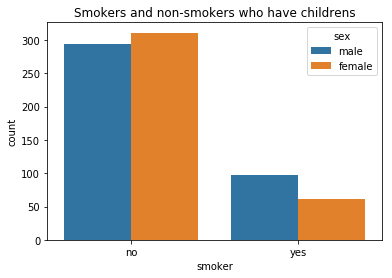

In [0]:
sns.countplot(x='smoker',data=df[df['children']> 0],hue='sex')
plt.title('Smokers and non-smokers who have childrens')

In [0]:
X.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [0]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [0]:
X.shape

(1337, 11)

## Test Train Split The data

In [0]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1)

## Train the Linear Regression Model with training data

In [0]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Regression Score : ",r2_score(y_test,y_pred))
print('RMSE Score : ',np.sqrt(mean_squared_error(y_test,y_pred)))

Regression Score :  0.7497814388540702
RMSE Score :  5689.308291189105


## Train the  RandomForestRegressor Model with training data

In [0]:
rf = RandomForestRegressor(n_estimators = 100)#default estimators
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Regression Score : ",r2_score(y_test,y_pred))
print('RMSE Score : ',np.sqrt(mean_squared_error(y_test,y_pred)))

Regression Score :  0.8305228518224964
RMSE Score :  4682.257353601733


## Using GridSearchCV to choose best parameters

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

## Create Base Model

In [0]:
rf = RandomForestRegressor()

## Instantiate the grid search model

In [0]:
grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)

## Note :

This will try out 2 * 4 * 2 * 3 * 3 * 4 = 576 combinations of settings. We can fit the model, display the best hyperparameters, and evaluate performance

## Fit the grid search to the data

In [0]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 10.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
     

In [0]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

##Applying the best parameters obtained from gridsearchcv

In [0]:
rf =RandomForestRegressor(**grid.best_params_)

In [0]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=110,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

In [0]:
print("Regression Score : ",r2_score(y_test,y_pred))
print('RMSE Score : ',np.sqrt(mean_squared_error(y_test,y_pred)))

Regression Score :  0.8486772362855033
RMSE Score :  4424.374075600497


## Note :

The Regression Score has improved after applying GridSerchCV

In [0]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
629,44,38.950,0,1,0,0,1,0,1,0,0
1087,57,31.540,0,0,1,1,0,0,1,0,0
283,55,32.395,1,1,0,1,0,1,0,0,0
790,39,41.800,0,1,0,1,0,0,0,1,0
594,41,40.260,0,0,1,1,0,0,0,1,0


In [0]:
X_test['Charges'] = y_test
X_test['Predicted_Charges'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Charges,Predicted_Charges
629,44,38.950,0,1,0,0,1,0,1,0,0,42983.45850,41737.974975
1087,57,31.540,0,0,1,1,0,0,1,0,0,11353.22760,11691.237910
283,55,32.395,1,1,0,1,0,1,0,0,0,11879.10405,13321.924950
790,39,41.800,0,1,0,1,0,0,0,1,0,5662.22500,7287.415799
594,41,40.260,0,0,1,1,0,0,0,1,0,5709.16440,7833.784515


## Visualization of Charges vs Predicted Charges

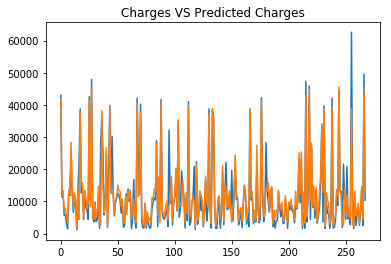

In [0]:
plt.plot(X_test['Charges'].values,label='Charges')
plt.plot(X_test['Predicted_Charges'].values,label='Predicted Charges')
plt.title('Charges VS Predicted Charges')
plt.show()